In [15]:
from transformers import pipeline
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [16]:
# Load text sentiment model
text_sentiment = pipeline("sentiment-analysis")

# Sample text data
texts = [
    "I love this product",
    "This is the worst experience",
    "The movie was okay",
    "Absolutely horrible service"
]

# Predict sentiments
results = text_sentiment(texts)

print("TEXT SENTIMENT RESULTS:\n")
for text, res in zip(texts, results):
    print(f"{text} -> {res['label']} ({res['score']:.2f})")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


TEXT SENTIMENT RESULTS:

I love this product -> POSITIVE (1.00)
This is the worst experience -> NEGATIVE (1.00)
The movie was okay -> POSITIVE (1.00)
Absolutely horrible service -> NEGATIVE (1.00)


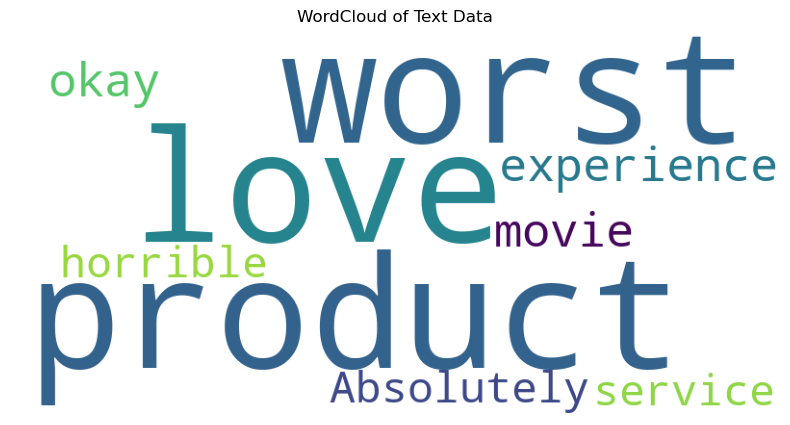

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text
combined_text = " ".join(texts)

# Generate WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(combined_text)

# Display WordCloud (FIXED)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud.to_image())
plt.axis("off")
plt.title("WordCloud of Text Data")
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
C:\Users\shaik\AppData\Local\Temp\ipykernel_27320\3340474024.py:16: SyntaxWarning: invalid escape sequence '\P'
  image_path = "D:\Projects\Sentiment_Analysis_tweets.ipynb\image.jpg"   # change name if needed
Device set to use cpu


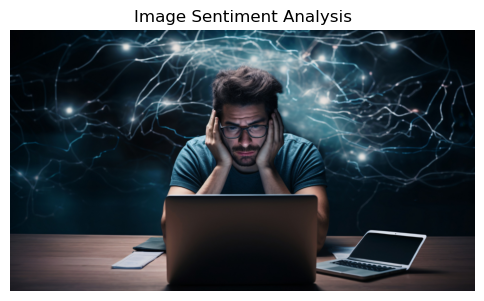

IMAGE SENTIMENT RESULTS:

negative emotion : 0.98
positive emotion : 0.02


In [19]:
# ================================
# IMAGE SENTIMENT ANALYSIS (CLIP)
# ================================

from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

# Load image sentiment model
image_sentiment = pipeline(
    "zero-shot-image-classification",
    model="openai/clip-vit-base-patch32"
)

# Load image
image_path = "D:\Projects\Sentiment_Analysis_tweets.ipynb\image.jpg"   # change name if needed
image = Image.open(image_path)

# Define sentiment labels
labels = ["positive emotion", "negative emotion"]

# Predict sentiment
results = image_sentiment(image, candidate_labels=labels)

# Display image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.title("Image Sentiment Analysis")
plt.show()

# Print results
print("IMAGE SENTIMENT RESULTS:\n")
for r in results:
    print(f"{r['label']} : {r['score']:.2f}")